In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [7]:
import os
import glob

import pandas as pd

import plotly.express as px

# import dash_bio

from modules.hmm import get_hits, get_seqs

In [3]:
DATA_DIR = "../data/runs/aquificota/2024-09-29/"

In [4]:
hits_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA_hmmer.txt"
)
seqs_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA.fa"
)

hits_df = get_hits(hits_path)
seqs_df = get_seqs(seqs_path)

hits_df = pd.merge(
    left=hits_df,
    right=seqs_df.rename(columns={"seq_id": "target_name"}),
    how="left",
    on="target_name"
)

# Create MAG and gene caller ID columns
hits_df["mag"] = hits_df["target_name"]\
    .str.split("_").str[:-1]\
    .apply(lambda row: "_".join(row))
hits_df["gene_caller_id"] = hits_df["target_name"]\
    .str.split("_").str[-1]

hits_df

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Persephonella_sp_M17_metabat2_scaf2bin_002_257,-,baker_rubisco_form_IV_alignment,-,8.700000e-108,364.4,0.0,9.800000e-108,364.3,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTTKQHVDPEKKAEELAISLSIGGWGDLSENKRKNLE...,Persephonella_sp_M17_metabat2_scaf2bin_002,257
1,Persephonella_sp_A1_metabat2_scaf2bin_131_1263,-,baker_rubisco_form_IV_alignment,-,1.800000e-107,363.4,0.0,2.000000e-107,363.2,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTSKKHIEPEKKAEELAISLSIGGWGDLPENKRKKLE...,Persephonella_sp_A1_metabat2_scaf2bin_131,1263
2,Aquificota_bacterium_L_MetaBat_11_1112,-,baker_rubisco_form_IV_alignment,-,1.700000e-104,353.6,0.0,1.900000e-104,353.4,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTTKEEINPEEKAKEIAISLSIGGTGDLPPEKIKELE...,Aquificota_bacterium_L_MetaBat_11,1112
3,Hydrogenothermaceae_bacterium_134_614_metabat2...,-,baker_rubisco_form_IV_alignment,-,4.500000e-104,352.2,0.0,5.000000e-104,352.1,0.0,...,0,0,1,1,1,1,-,MNYINVTYLLSSNKKFNVEEKAKRLAEELTIGSENNLRFNPKLKTY...,Hydrogenothermaceae_bacterium_134_614_metabat2...,573
4,Hydrogenothermaceae_bacterium_S141_maxbin2_sca...,-,baker_rubisco_form_IV_alignment,-,4.400000e-85,289.7,0.0,4.900000e-85,289.5,0.0,...,0,0,1,1,1,1,-,MNYIEAMYLIISDRKFDIEERAEELKRDVYIWNEKNYISDKERLRN...,Hydrogenothermaceae_bacterium_S141_maxbin2_sca...,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250276,Aquificaceae_bacterium_T2_maxbin2_scaf2bin_342...,-,metascan_WP_013516312.1,KO:K17052,1.300000e-10,45.2,0.0,1.900000e-10,44.8,0.0,...,0,0,1,1,1,1,-,MRYIGLFLLLTLATVFSGNVENGKKIYDQWCAQCHGYEGDGMGYAE...,Aquificaceae_bacterium_T2_maxbin2_scaf2bin_342,790
1250277,Aquificaceae_bacterium_S141_87_esom_1070,-,metascan_WP_013516312.1,KO:K17052,1.100000e-09,42.3,0.4,1.300000e-09,42.0,0.4,...,0,0,1,1,1,1,-,IHPNYAYDWYPHAKPPYKYPEDWANQYALAYIGGEKVFRKNTFKTP...,Aquificaceae_bacterium_S141_87_esom,1070
1250278,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,-,metascan_WP_013516312.1,KO:K17052,1.300000e-06,32.2,0.0,2.000000e-06,31.6,0.0,...,0,0,1,1,1,1,-,MKYIGLFLLLILSTVFAGNAENGKKIYDQWCAQCHGYEGEGNGYAA...,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,656
1250279,Persephonella_sp_PIR_30_metabat2_scaf2bin_079_...,-,metascan_WP_013516312.1,KO:K17052,5.100000e-03,20.4,0.0,5.800000e-03,20.2,0.0,...,0,0,1,1,1,1,-,MNRGLKAGLLGLSLIAFTATAGEKEFFKYEVINGKYVEGEISADPD...,Persephonella_sp_PIR_30_metabat2_scaf2bin_079,1582


In [5]:
# Get only those hits with the lowest E-value
hits_df_min = hits_df.loc[
    hits_df.groupby("target_name")["e_value_full_seq"].idxmin()
].reset_index(drop=True)

del hits_df

hits_df_min

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Aquifex_aeolicus_HyVt_501_1001,-,metascan_A0A023X3G8,KO:K01560,1.300000e-09,42.3,0.0,3.300000e-06,31.1,0.0,...,0,0,3,3,2,1,-,MLTLLIDMDGVLTRDKEFTPFDYAPAFIRHLKERGIPFRIVSNNST...,Aquifex_aeolicus_HyVt_501,1001
1,Aquifex_aeolicus_HyVt_501_1010,-,magiclamp_iron_aquisition-siderophore_synthesi...,-,2.600000e-02,18.2,0.0,3.400000e-02,17.8,0.0,...,0,0,1,1,1,0,-,MGNNYNRSTMRVLITGAAGFIGSHLCEKFLEEGHEVIGLDNFLTGS...,Aquifex_aeolicus_HyVt_501,1010
2,Aquifex_aeolicus_HyVt_501_1015,-,magiclamp_wsp_GGDEF,PF00990.21,8.500000e-41,143.4,0.0,1.200000e-40,142.9,0.0,...,0,0,1,1,1,1,-,MILEYAAYESLLLSALALAAVLFSVLRRGLRELALMASGFLLLAFS...,Aquifex_aeolicus_HyVt_501,1015
3,Aquifex_aeolicus_HyVt_501_1022,-,metabolic_TIGR01054,TIGR01054,1.500000e-52,182.4,3.6,8.400000e-52,179.9,3.6,...,1,0,1,1,1,1,-,VDKRTEKIVSPRPFITSSLQSEANARLGFSPEKTQTLAQTLYEQGS...,Aquifex_aeolicus_HyVt_501,1022
4,Aquifex_aeolicus_HyVt_501_1029,-,magiclamp_plastics_atsB.refseq_protein_35piden...,-,1.500000e-01,14.8,1.8,1.600000e-01,14.7,1.8,...,0,0,1,1,1,0,-,MSRKALALIASLLPALGFAAETGADGSGDKALFFGLVALASGLAIG...,Aquifex_aeolicus_HyVt_501,1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90336,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,metabolic_dsrH_protein.alignment,-,2.100000e+00,12.7,0.0,4.300000e+00,11.7,0.0,...,0,0,1,1,1,0,-,MQKRIVLCITGASGAIYGYRLLQVLTSMSFHIDLIVSSSGWLVIKE...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,989
90337,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa_FeoB_N,PF02421.13,6.200000e-09,39.5,0.2,2.700000e-08,37.4,0.2,...,1,0,1,1,1,1,-,MIKQREPIVAIATPFGESAIGAIRLSGLGVLEKIKDLLIMKGEPKP...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,991
90338,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,magiclamp_magneto_MamA,-,6.400000e-18,69.0,18.9,2.100000e-11,47.7,5.7,...,1,2,3,3,3,3,-,MIRSIVSLLLISVLFSCAAKKENTDTTQWRYLYDLGMSSYIAKNYS...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,995
90339,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,magiclamp_iron_aquisition-heme_transport_HasB-...,-,6.000000e-02,17.3,5.7,7.300000e-02,17.0,5.7,...,0,0,1,1,1,0,-,MKKERLILLLGVLIALIFFYLGLNQWLKTKEEIQPPPLVVETAPKS...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,996


In [6]:
# Presence/abscence (remove for having the counts of many-vs-many)
heat_df = hits_df_min[["mag", "query_name"]].copy()

del hits_df_min

heat_df = heat_df.rename(columns={"query_name": "profile"})
heat_df = heat_df\
    .value_counts()\
    .reset_index(drop=False)\
    .rename(columns={0: "count"})

# Add collumn for displaying presence/absence
heat_df["presence"] = heat_df["count"].apply(lambda row: int(bool(row)))

# Filter profiles
heat_df["source"] = heat_df["profile"].str.split("_").str[0]

heat_df = heat_df.pivot(
    index="mag",
    columns="profile",
    values="presence"
)

# Fill NaNs
heat_df = heat_df.fillna(0.0)

heat_df

profile,baker_/export/uec-gs1/pdthomas/panther/famlib/rel/PANTHER10.0/books/PTHR10632/hmmer.hmm,baker_Hydrogenase_Vignais_Group_1_alignment,baker_Hydrogenase_Vignais_Group_2a_alignment,baker_Hydrogenase_Vignais_Group_2b_alignment,baker_Hydrogenase_Vignais_Group_3a_alignment,baker_Hydrogenase_Vignais_Group_3c_alignment,baker_Hydrogenase_Vignais_Group_3d_alignment,baker_Hydrogenase_Vignais_Group_4_alignment,baker_MmoB_PF02406_full.stockholm,baker_NrfA_PF02335_full,...,metascan_WP_090742150,metascan_X2H790,metascan_X4Z9L5,metascan_X4ZEI9,metascan_X4ZQ70,metascan_X4ZVJ5,metascan_X8CIV6,metascan_YP_002497622,metascan_YP_003205093,metascan_YP_007912793
mag,,,,,,,,,,,,,,,,,,,,,
Aquifex_aeolicus_HyVt_501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aquifex_aeolicus_SZUA_1413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aquifex_aeolicus_SZUA_1501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aquifex_aeolicus_SZUA_1519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aquifex_aeolicus_VF5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thermovibrio_sp_S012_127_esom,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thermovibrio_sp_S141_83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Venenivibrio_stagnispumantis_DSM_18763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Get correct HMM model name mapping

hmm_mapping = {}

for hmm_path in glob.glob("../data/profiles/barosa/*.hmm"):
    hmm_filename = os.path.basename(hmm_path)

    with open(hmm_path, mode="r") as handle:
        hmm_name = handle.readlines()[1]\
            .replace("NAME  ", "")\
            .replace("\n", "")

        hmm_mapping[hmm_filename] = hmm_name

In [20]:
metadata_df = pd.read_excel(
    os.path.join(
        "../data/",
        "Aquificota_Revised_Biogeochem_genes.xlsx"
    ),
    sheet_name="Revised_biogeochem",
    engine="openpyxl"
)

metadata_df = metadata_df\
    .dropna(how="all", axis=0)\
    .dropna(how="all", axis=1)

# Fix HMM names
metadata_df = metadata_df.rename(columns={"hmm model": "hmm_model"})
metadata_df["hmm_model"] = metadata_df["hmm_model"].map(hmm_mapping)

# Format cycle column
metadata_df["Cycle"] = metadata_df["Cycle"].str.strip()

# Format HMM column to fit file format
metadata_df["hmm_model"] = metadata_df["hmm_model"]\
    .apply(lambda row: f"barosa_{row.replace('.hmm', '')}")

metadata_df["Cycle"] = metadata_df["Cycle"].map({
    "Arsenic": "orange",
    "Carbon": "black",
    "Methane": "gray",
    "Nitrogen": "blue",
    "Oxygen": "red",
    "Photosynthesis": "lime",
    "Sulfur": "yellow",
    "Hydrogen": "lightgray",
    "Iron": "brown",
    "Selenium": "cyan",
    "Transporters": "purple"
})
cycle_colors = metadata_df.set_index("hmm_model")["Cycle"]
cycle_colors

hmm_model
barosa_arsC_glut                                                                                  orange
barosa_arsC_thio                                                                                  orange
barosa_arxA                                                                                       orange
barosa_aioA                                                                                       orange
barosa_K03520                                                                                      black
                                                                                                   ...  
barosa_Sid_LbtC_Legiobactin_PAP2_superfamily_Legionella_oakridgensis_AHE65915.1_180604             brown
barosa_Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623                                        brown
barosa_Sid_VabS_Vanchrobactin_Export_Vibrio_anguillarum_CAJ45638.1_180623                          brown
barosa_Sid_YqjH_NADPH-dep_ferric_chelate_redu

In [21]:
tax_df = pd.read_csv(
    os.path.join(
        "../data/",
        "Aquificota_gtdb_classification.csv"
    )
)
tax_df["Genomes"] = tax_df["Genomes"].str.split("\\td__").str[0]
tax_df["Family"] = tax_df["Family"].str.split("__").str[-1]
tax_df["Family"] = tax_df["Family"].map({
    "Aquificaceae": "darkred",
    "Desulfurobacteriaceae": "lightgreen",
    "DSM-5069": "darkgreen",
    "Hydrogenothermaceae": "orange",
    "QOAS01": "darkgrey",
    "Thermotogaceae": "lime"
})
family_colors = tax_df.set_index("Genomes")["Family"]
family_colors

Genomes
Aquifex_aeolicus_HyVt_501                                        darkred
Aquifex_aeolicus_SZUA_1413                                       darkred
Aquifex_aeolicus_SZUA_1501                                      darkgrey
Aquifex_aeolicus_SZUA_1519                                      darkgrey
Aquifex_aeolicus_VF5                                             darkred
                                                                 ...    
Thermovibrio_sp_S012_127_esom                                 lightgreen
Thermovibrio_sp_S141_83                                       lightgreen
Venenivibrio_stagnispumantis_DSM_18763                            orange
unclassified_Aquificaceae_Obs3_genome_041_Obs3_genome_041        darkred
uncultured_Aquificaceae_bacterium_S1_Bin_MAXBIN__048_sub_1       darkred
Name: Family, Length: 175, dtype: object

In [22]:
import seaborn as sns
from seaborn import clustermap

import matplotlib.pyplot as plt

sns.set(font_scale=0.25)

In [ ]:
# clustermap(
#     data=heat_df,
#     method="average",
#     metric="hamming",
#     row_colors=pd.concat([family_colors], axis=1),
#     figsize=(70, 50)
# )
# plt.savefig(
#     os.path.join(
#         DATA_DIR,
#         "heatmap.svg"
#     ),
#     # dpi=600
# )

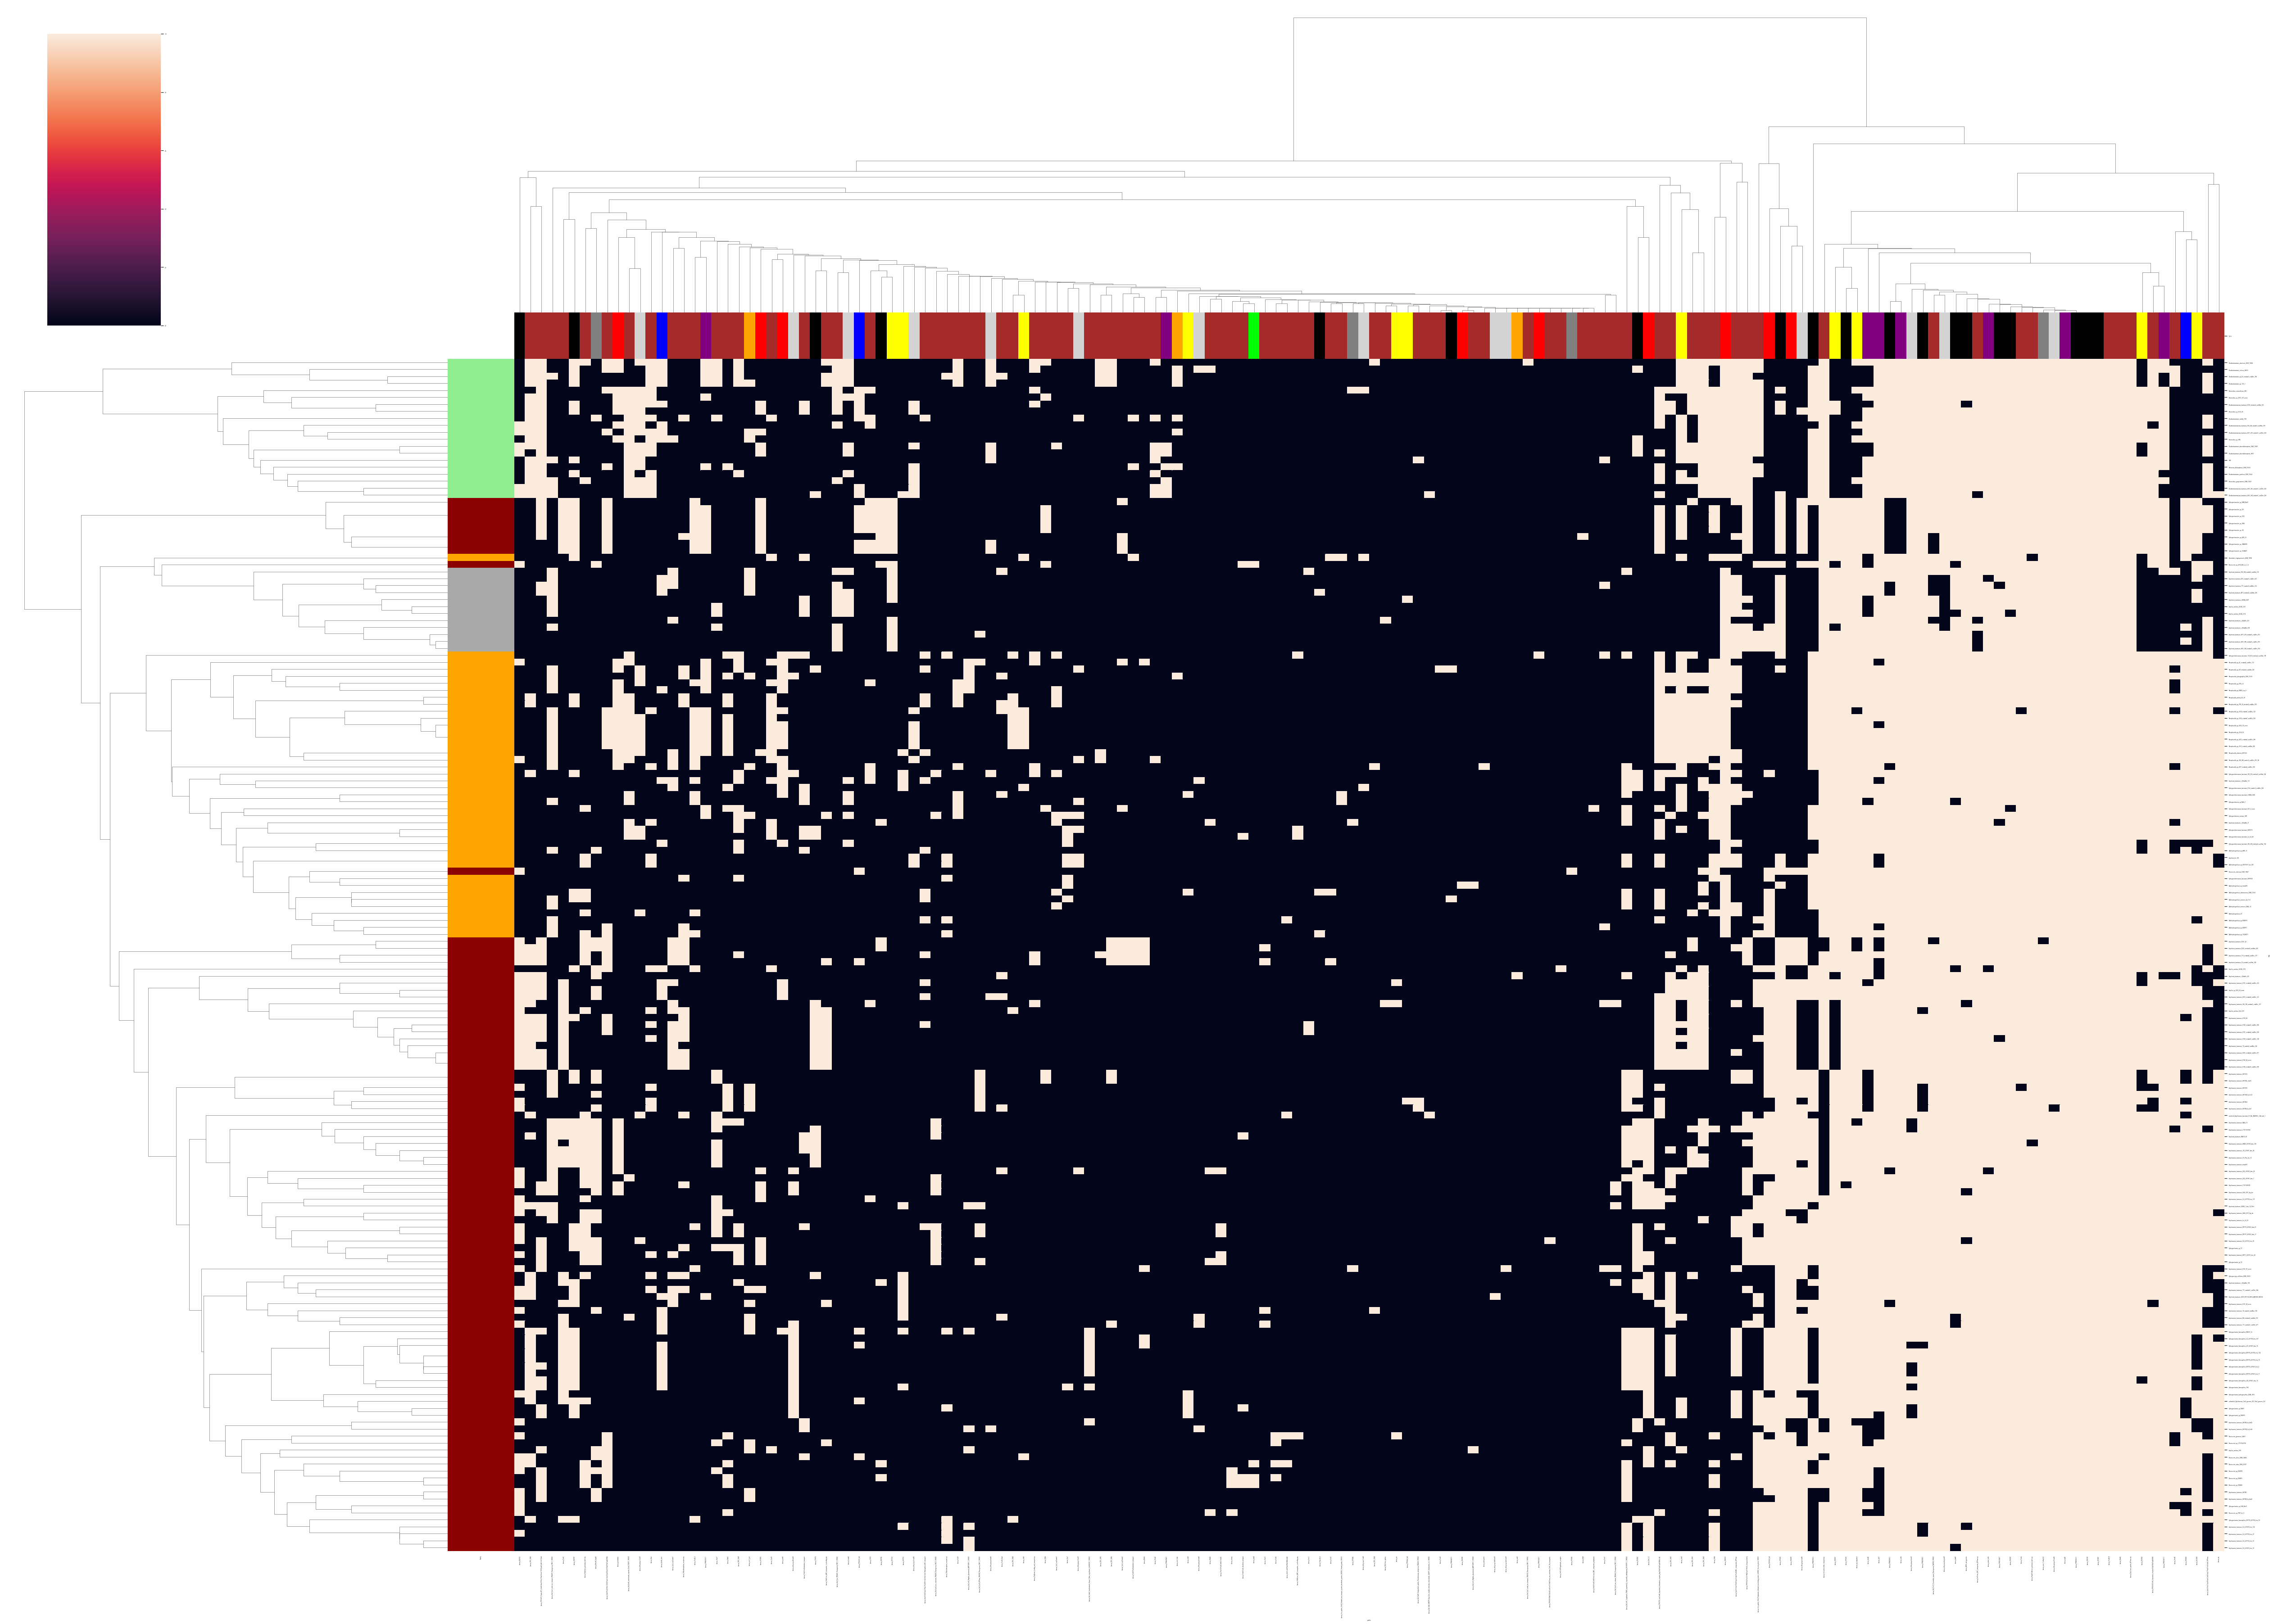

In [23]:

selected_models = ["barosa"]

heat_df_selected = heat_df[
    heat_df.columns[
        heat_df.columns.str.startswith(tuple(selected_models))
    ]
]

clustermap(
    data=heat_df_selected,
    method="average",
    metric="hamming",
    row_colors=family_colors,
    col_colors=cycle_colors,
    figsize=(70, 50)
)
plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=600
)

In [11]:
# fig = dash_bio.Clustergram(
#     data=heat_df,
#     column_labels=list(heat_df.columns.values),
#     row_labels=list(heat_df.index),
#     height=2500,
#     width=2500
# )
# fig.update_layout(
#     font_size=5
# )
# fig.write_html("heatmap.html")